In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc


In [3]:
conn = pyodbc.connect("DRIVER={SQL Server};SERVER=LAPTOP-CF4MG3HB\SQLEXPRESS;DATABASE=HealthcareAnalytics;Trusted_Connection=yes")

In [4]:
query_1 = "SELECT * FROM Transaction_coo"
Transaction_coo = pd.read_sql(query_1, conn)

query_2 = "SELECT * FROM Review_transaction_coo"
Review_transaction_coo = pd.read_sql(query_2, conn)

query_3 = "SELECT * FROM Patient_history_samp"
Patient_history_samp = pd.read_sql(query_3, conn)

query_4 = "SELECT * FROM Review_patient_history_samp"
Review_patient_history_samp = pd.read_sql(query_4, conn)

query_5 = "SELECT * FROM Medicare_Provider_Charge_Inpatient"
Medicare_Provider_Charge_Inpatient = pd.read_sql(query_5, conn)

query_6 = "SELECT * FROM Medicare_Provider_Charge_Outpatient"
Medicare_Provider_Charge_Outpatient = pd.read_sql(query_6, conn)

query_7 = "SELECT * FROM Medicare_Charge_Inpatient_Summary"
Medicare_Charge_Inpatient_Summary = pd.read_sql(query_7, conn)

query_8 = "SELECT * FROM Medicare_Charge_Outpatient_Summary"
Medicare_Charge_Outpatient_Summary = pd.read_sql(query_8, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_28204\367679049.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Transaction_coo = pd.read_sql(query_1, conn)
C:\Users\hp\AppData\Local\Temp\ipykernel_28204\367679049.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Review_transaction_coo = pd.read_sql(query_2, conn)
C:\Users\hp\AppData\Local\Temp\ipykernel_28204\367679049.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Patient_history_samp = pd.read_sql(query_3, conn)
C:\Users\hp\AppData\Local\Temp\ipykernel_28204\36767904

#### Exploratory Data Analysis

In [5]:
Transaction_coo.info()
print("\n")  

Review_transaction_coo.info()
print("\n")  

Patient_history_samp.info()
print("\n")  

Review_patient_history_samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   id              1514809 non-null  int64
 1   global_proc_id  1514809 non-null  int64
 2   count           1514809 non-null  int64
dtypes: int64(3)
memory usage: 34.7 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15041 entries, 0 to 15040
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              15041 non-null  int64
 1   global_proc_id  15041 non-null  int64
 2   count           15041 non-null  int64
dtypes: int64(3)
memory usage: 352.7 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      500000 non-null  int64 
 1   age     497470 non-null  object

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#### Patients occuring more than once 

In [7]:
patient_counts = Transaction_coo['id'].value_counts()
duplicate_patients = patient_counts[patient_counts > 1]
result_df = duplicate_patients.reset_index()
result_df.columns = ['id', 'Transaction_coo']

print(result_df)

               id  Transaction_coo
0        14865469               13
1       978976597               12
2        60137557               11
3       701793025               11
4       780001804               11
...           ...              ...
436485  739128614                2
436486  739922584                2
436487  475286407                2
436488  721562891                2
436489  718437727                2

[436490 rows x 2 columns]


count
2     137110
3     136087
4      90792
5      45759
6      18322
7       6116
8       1772
9        411
10        98
11        21
12         1
13         1
Name: count, dtype: int64


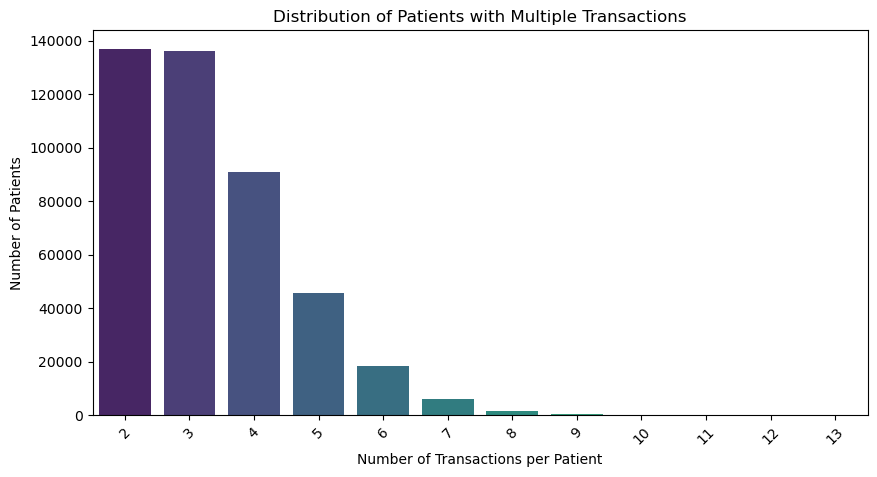

In [9]:
transaction_distribution = duplicate_patients.value_counts().sort_index()

print(transaction_distribution)
# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=transaction_distribution.index, y=transaction_distribution.values, palette="viridis")

# Labels and title
plt.xlabel("Number of Transactions per Patient")
plt.ylabel("Number of Patients")
plt.title("Distribution of Patients with Multiple Transactions")

plt.xticks(rotation=45)
plt.show()

* It identifies patients with multiple transactions.
* It helps detect potential repeat visits, multiple procedures, or even fraudulent activity if certain patterns emerge.
* It could be used for further anomaly detection, such as patients with an unusually high number of transactions.

 #### Gender,Age and Income Distribution for Patient History Sample

In [28]:
def calculate_distribution(df, column):
    count_series = df[column].value_counts().reset_index()
    count_series.columns = [column, 'Count']
    count_series['Percentage'] = round((count_series['Count'] * 100.0 / len(df)), 2)
    return count_series

def plot_distribution(distribution_df, column, title):
    plt.figure(figsize=(5, 4))
    plt.bar(distribution_df[column].astype(str), distribution_df['Count'])
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

Gender Distribution:
   gender   Count  Percentage
0      F  274512        54.9
1      M  225488        45.1


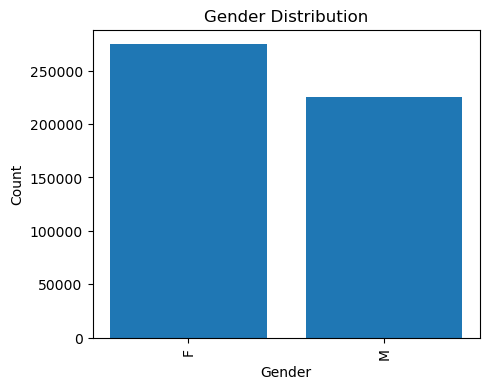


Age Distribution:
      age   Count  Percentage
0  65-74  219329       43.87
1  75-84  128992       25.80
2    <65   84568       16.91
3    85+   64581       12.92


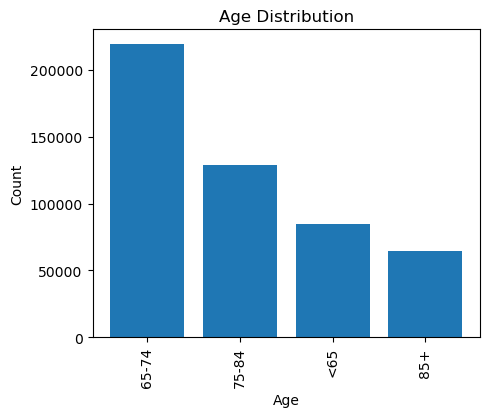


Income Distribution:
         income   Count  Percentage
0       48000+  115865       23.17
1       <16000  107543       21.51
2  16000-23999  102492       20.50
3  32000-47999   95899       19.18
4  24000-31999   75670       15.13


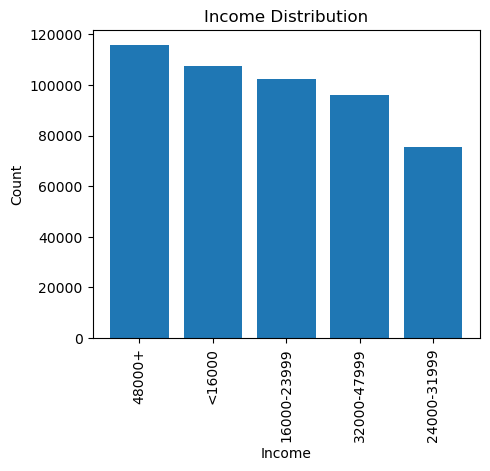

In [29]:
# Gender distribution
gender_distribution = calculate_distribution(Patient_history_samp, 'gender')
print("Gender Distribution:\n", gender_distribution)
plot_distribution(gender_distribution, 'gender', 'Gender Distribution')

# Age distribution
age_distribution = calculate_distribution(Patient_history_samp, 'age')
print("\nAge Distribution:\n", age_distribution)
plot_distribution(age_distribution, 'age', 'Age Distribution')

# Income distribution
income_distribution = calculate_distribution(Patient_history_samp, 'income')
print("\nIncome Distribution:\n", income_distribution)
plot_distribution(income_distribution, 'income', 'Income Distribution')

In [10]:
num_global_proc_ids = Transaction_coo['global_proc_id'].nunique()
print(f"Total unique global_proc_id: {num_global_proc_ids}")

Total unique global_proc_id: 130


#### Total Count by Procedure


Procedure Count:
     global_proc_id   count
25              26  291815
24              25  189441
26              27  148554
16              17   72515
18              19   62283
..             ...     ...
72              73     924
6                7     651
20              21     576
5                6     470
9               10     284

[130 rows x 2 columns]


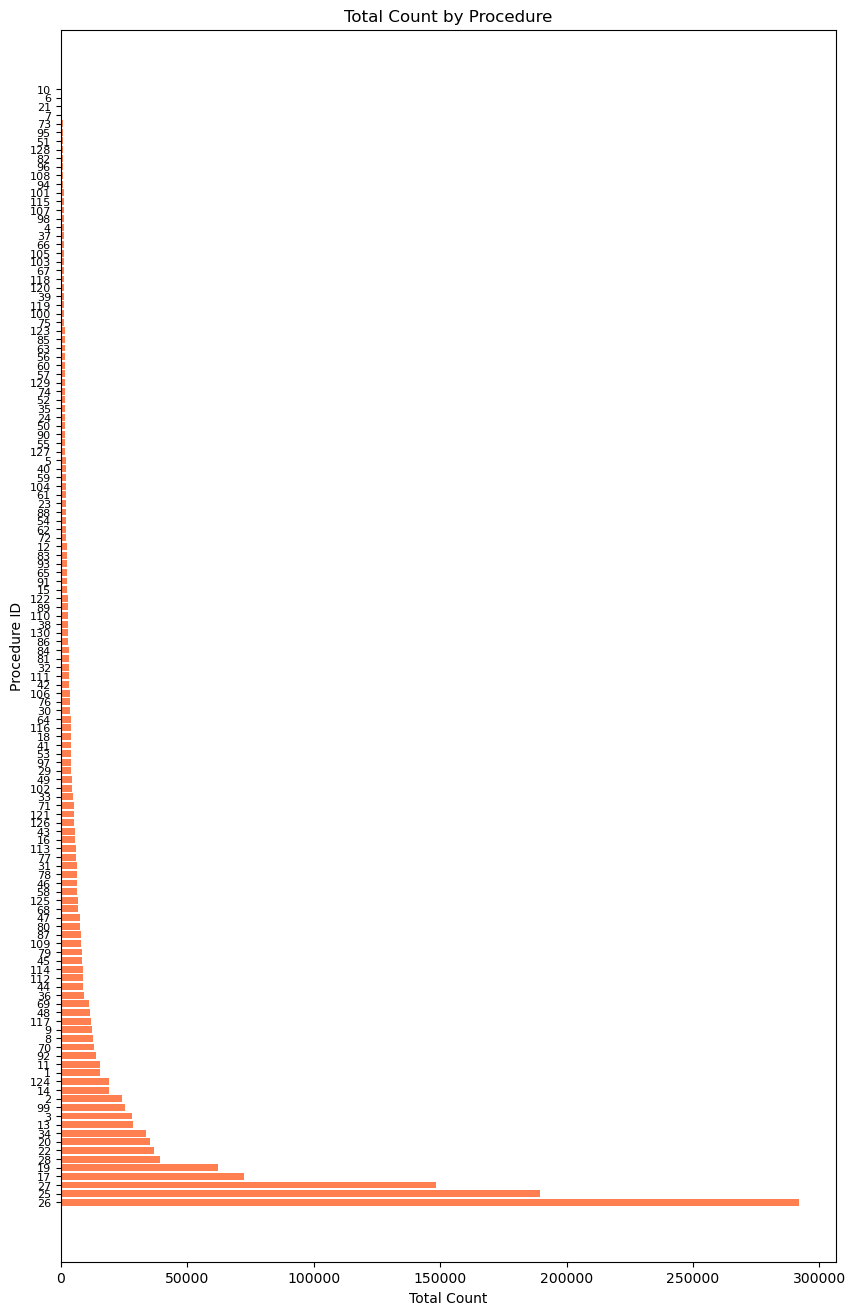

In [30]:

procedure_count = Transaction_coo.groupby('global_proc_id')['count'].sum().reset_index()
procedure_count = procedure_count.sort_values(by='count', ascending=False)
print("\nProcedure Count:\n",procedure_count)

# Plot procedure count
plt.figure(figsize=(10, 16))
plt.barh(procedure_count['global_proc_id'].astype(str), procedure_count['count'], color='coral')
plt.ylabel('Procedure ID')
plt.xlabel('Total Count', fontsize=10)
plt.title('Total Count by Procedure')
plt.yticks(fontsize=8)
plt.show()


#### Top 10 Procedures


Top 10 Procedure Count:
     global_proc_id   count
25              26  291815
24              25  189441
26              27  148554
16              17   72515
18              19   62283
27              28   39296
21              22   36891
19              20   35371
33              34   33719
12              13   28510


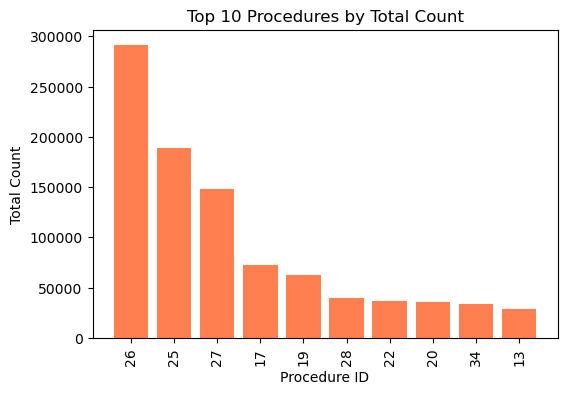

In [31]:
top_10_procedures = procedure_count.nlargest(10, 'count')
print("\nTop 10 Procedure Count:\n",top_10_procedures)
# Plot procedure count
plt.figure(figsize=(6, 4))
plt.bar(top_10_procedures['global_proc_id'].astype(str), top_10_procedures['count'], color='coral')
plt.xlabel('Procedure ID')
plt.ylabel('Total Count')
plt.title('Top 10 Procedures by Total Count')
plt.xticks(rotation=90)
plt.show()

#### Gender, Age and Income Distribution for Revisiting Patients


Gender Distribution Among Revisiting Patients:
   gender  Count  Percentage
0      F   2738       54.76
1      M   2262       45.24


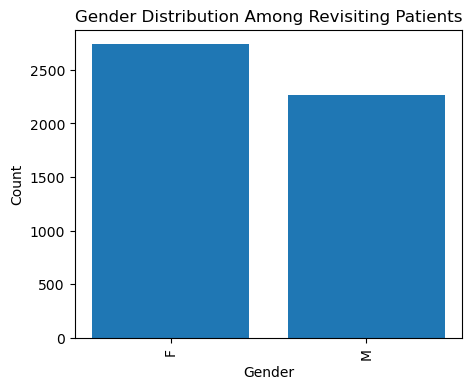


Income Distribution Among Revisiting Patients:
         income  Count  Percentage
0       48000+   1184       23.80
1       <16000   1104       22.20
2  16000-23999   1062       21.35
3  32000-47999    884       17.77
4  24000-31999    740       14.88


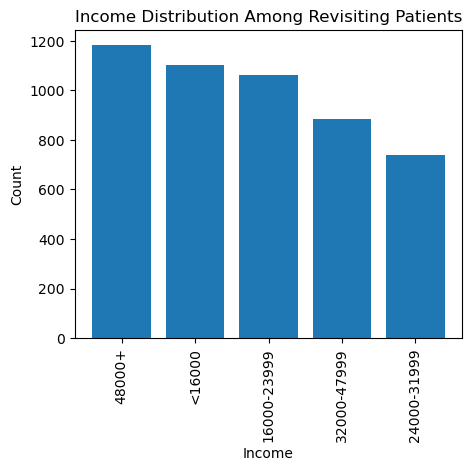


Age Group Distribution Among Revisiting Patients:
      age  Count  Percentage
0  65-74   2179       43.81
1  75-84   1241       24.95
2    <65    880       17.69
3    85+    648       13.03


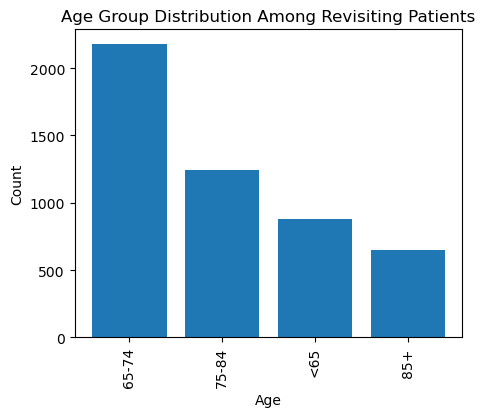

In [32]:
# Gender distribution among revisiting patients
gender_review_distribution = calculate_distribution(Review_patient_history_samp, 'gender')
print("\nGender Distribution Among Revisiting Patients:\n", gender_review_distribution)
plot_distribution(gender_review_distribution, 'gender', 'Gender Distribution Among Revisiting Patients')

# Income distribution among revisiting patients
income_review_distribution = calculate_distribution(Review_patient_history_samp.dropna(subset=['income']), 'income')
print("\nIncome Distribution Among Revisiting Patients:\n", income_review_distribution)
plot_distribution(income_review_distribution, 'income', 'Income Distribution Among Revisiting Patients')

# Age group distribution among revisiting patients
age_review_distribution = calculate_distribution(Review_patient_history_samp.dropna(subset=['income']), 'age')
print("\nAge Group Distribution Among Revisiting Patients:\n", age_review_distribution)
plot_distribution(age_review_distribution, 'age', 'Age Group Distribution Among Revisiting Patients')

#### Revisit Procedure Count

In [33]:
revisit_procedure_count = Review_transaction_coo.groupby('global_proc_id')['count'].sum().reset_index()
revisit_procedure_count = revisit_procedure_count.sort_values(by='count', ascending=False)

print("\nRevisit Procedure Count:\n",revisit_procedure_count)


Revisit Procedure Count:
      global_proc_id  count
97               99   1120
122             124    859
56               58    412
67               69    391
95               97    369
..              ...    ...
13               15      1
34               36      1
33               35      1
19               21      1
8                10      1

[129 rows x 2 columns]


#### Top 10 Revisit Procedures


Top 10 Revisit Procedure Count:
      global_proc_id  count
97               99   1120
122             124    859
56               58    412
67               69    391
95               97    369
120             122    329
68               70    325
90               92    314
46               48    305
45               47    283


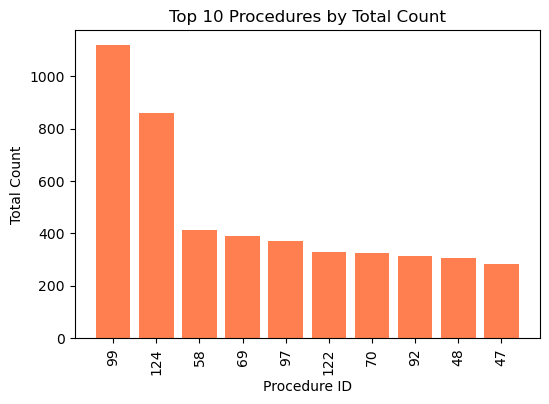

In [34]:
top_10_revisit_procedures = revisit_procedure_count.nlargest(10, 'count')
print("\nTop 10 Revisit Procedure Count:\n",top_10_revisit_procedures)
# Plot procedure count
plt.figure(figsize=(6, 4))
plt.bar(top_10_revisit_procedures['global_proc_id'].astype(str), top_10_revisit_procedures['count'], color='coral')
plt.xlabel('Procedure ID')
plt.ylabel('Total Count')
plt.title('Top 10 Procedures by Total Count')
plt.xticks(rotation=90)
plt.show()

In [35]:
Medicare_Provider_Charge_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   DRG_Definition                            163065 non-null  object 
 1   Provider_Id                               163065 non-null  int64  
 2   Provider_Name                             163065 non-null  object 
 3   Provider_Street_Address                   163065 non-null  object 
 4   Provider_City                             163065 non-null  object 
 5   Provider_State                            163065 non-null  object 
 6   Provider_Zip_Code                         163065 non-null  int64  
 7   Hospital_Referral_Region_HRR_Description  163065 non-null  object 
 8   Total_Discharges                          163065 non-null  int64  
 9   Average_Covered_Charges                   163065 non-null  float64
 10  Average_Total_Paymen

#### Summary Inpatient

In [36]:
summary = {
    "DRG_Definition":  Medicare_Provider_Charge_Inpatient ["DRG_Definition"].nunique(),
    "Unique_Providers":  Medicare_Provider_Charge_Inpatient ["Provider_Id"].nunique(),
    "Unique_States":  Medicare_Provider_Charge_Inpatient ["Provider_State"].nunique(),
    "Unique_Cities":  Medicare_Provider_Charge_Inpatient ["Provider_City"].nunique()
}
summary_df = pd.DataFrame([summary])
print(summary_df)


   DRG_Definition  Unique_Providers  Unique_States  Unique_Cities
0             100              3337             51           1977


#### Frequency Count of DRG Definition

In [37]:

drg_count = Medicare_Provider_Charge_Inpatient['DRG_Definition'].value_counts().reset_index()
drg_count.columns = ['DRG_Definition', 'Frequency']
drg_count = drg_count.sort_values(by='Frequency', ascending=False)
print("\nFrequency of DRG Definitions:\n", drg_count)


Frequency of DRG Definitions:
                                        DRG_Definition  Frequency
0              194 - SIMPLE PNEUMONIA & PLEURISY W CC       3023
1     690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC       2989
2                    292 - HEART FAILURE & SHOCK W CC       2953
3   392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...       2950
4   641 - MISC DISORDERS OF NUTRITION,METABOLISM,F...       2899
..                                                ...        ...
95      315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC        859
96            473 - CERVICAL SPINAL FUSION W/O CC/MCC        846
97     917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC        843
98  251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY...        727
99                                    885 - PSYCHOSES        613

[100 rows x 2 columns]


#### Top 10 DRG Definitions


Top 10 DRG Definition:
                                       DRG_Definition  Frequency
0             194 - SIMPLE PNEUMONIA & PLEURISY W CC       3023
1    690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC       2989
2                   292 - HEART FAILURE & SHOCK W CC       2953
3  392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...       2950
4  641 - MISC DISORDERS OF NUTRITION,METABOLISM,F...       2899
5  871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...       2812
6                           603 - CELLULITIS W/O MCC       2807
7  470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...       2750
8   191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC       2720
9  190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC       2713


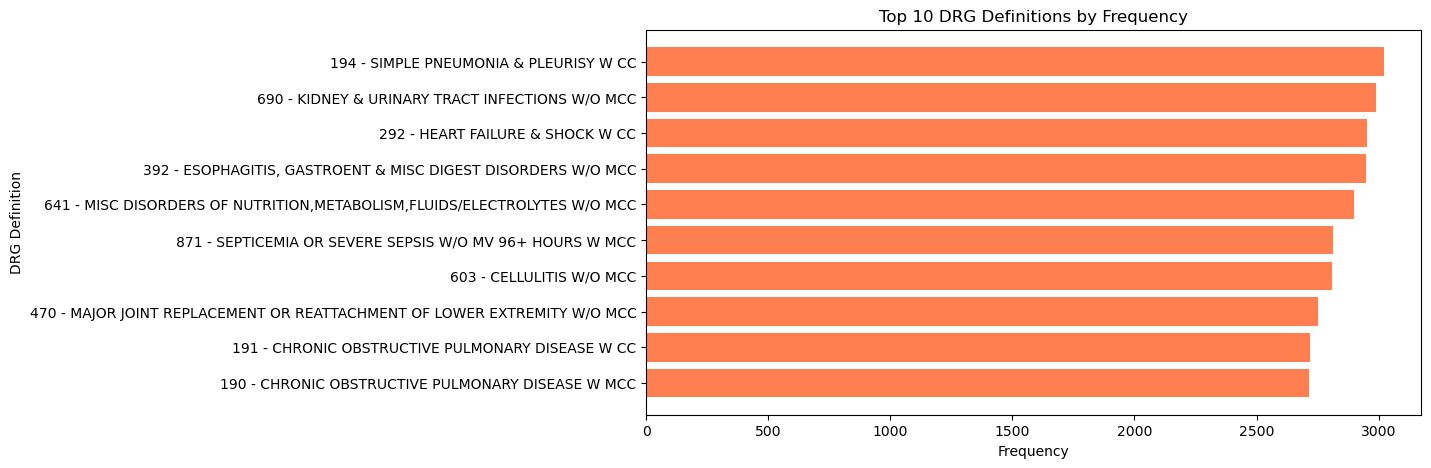

In [38]:
drg_count = Medicare_Provider_Charge_Inpatient['DRG_Definition'].value_counts().reset_index()
drg_count.columns = ['DRG_Definition', 'Frequency']
drg_count = drg_count.sort_values(by='Frequency', ascending=False)
print("\nTop 10 DRG Definition:\n", drg_count.head(10))

# Plot top 10 DRG Definitions
plt.figure(figsize=(10, 5))
plt.barh(drg_count['DRG_Definition'].head(10).astype(str), drg_count['Frequency'].head(10), color='coral')
plt.xlabel('Frequency')
plt.ylabel('DRG Definition')
plt.title('Top 10 DRG Definitions by Frequency')
plt.gca().invert_yaxis()
plt.show()

#### Top 10 DRG Definitions by Average Covered Charges & Payments


Top 10 DRG Definitions by Avg Covered Charges:
                                        DRG_Definition  \
92   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS   
21  207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...   
91  853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...   
52   329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC   
26  246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...   
66        460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC   
23          238 - MAJOR CARDIOVASC PROCEDURES W/O MCC   
30              252 - OTHER VASCULAR PROCEDURES W MCC   
67  469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...   
70  480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...   

    Average_Covered_Charges  Average_Total_Payments  
92            163227.335838            44259.489787  
21            143428.055193            38588.924960  
91            139186.355013            40315.965643  
52            135330.944075            37765.598321  
26             96348.810634            23326.342981  

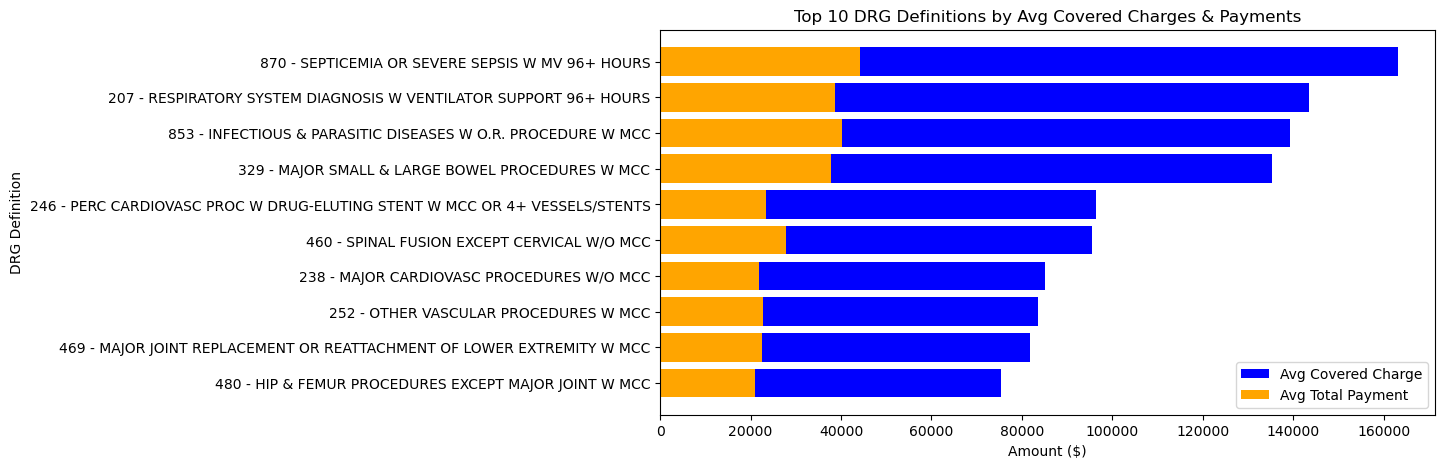

In [39]:

drg_avg_charges = Medicare_Provider_Charge_Inpatient.groupby('DRG_Definition').agg({
    'Average_Covered_Charges': 'mean',
    'Average_Total_Payments': 'mean'
}).reset_index()
drg_avg_charges = drg_avg_charges.sort_values(by='Average_Covered_Charges', ascending=False).head(10)
print("\nTop 10 DRG Definitions by Avg Covered Charges:\n", drg_avg_charges)

# Plot Average Covered Charges & Payments
plt.figure(figsize=(10, 5))
plt.barh(drg_avg_charges['DRG_Definition'], drg_avg_charges['Average_Covered_Charges'], color='blue', label='Avg Covered Charge')
plt.barh(drg_avg_charges['DRG_Definition'], drg_avg_charges['Average_Total_Payments'], color='orange', label='Avg Total Payment')
plt.xlabel('Amount ($)')
plt.ylabel('DRG Definition')
plt.title('Top 10 DRG Definitions by Avg Covered Charges & Payments')
plt.legend()
plt.gca().invert_yaxis()
plt.show()


#### Top 10 Providers by Average Covered Charges


Top 10 Providers by Avg Covered Charges:
                             Provider_Name    Provider_City Provider_State  \
3134           UVA HEALTH SCIENCES CENTER  CHARLOTTESVILLE             VA   
207               BAYONNE HOSPITAL CENTER          BAYONNE             NJ   
681                DOCTORS MEDICAL CENTER          MODESTO             CA   
2851                    STANFORD HOSPITAL         STANFORD             CA   
1953              NORTHBAY MEDICAL CENTER        FAIRFIELD             CA   
605         CROZER CHESTER MEDICAL CENTER           UPLAND             PA   
3193                  WASHINGTON HOSPITAL          FREMONT             CA   
2496                 SETON MEDICAL CENTER        DALY CITY             CA   
2927           TEMPLE UNIVERSITY HOSPITAL     PHILADELPHIA             PA   
2281  REGIONAL MEDICAL CENTER OF SAN JOSE         SAN JOSE             CA   

      Average_Covered_Charges  
3134            211922.000000  
207             147441.337826  
681          

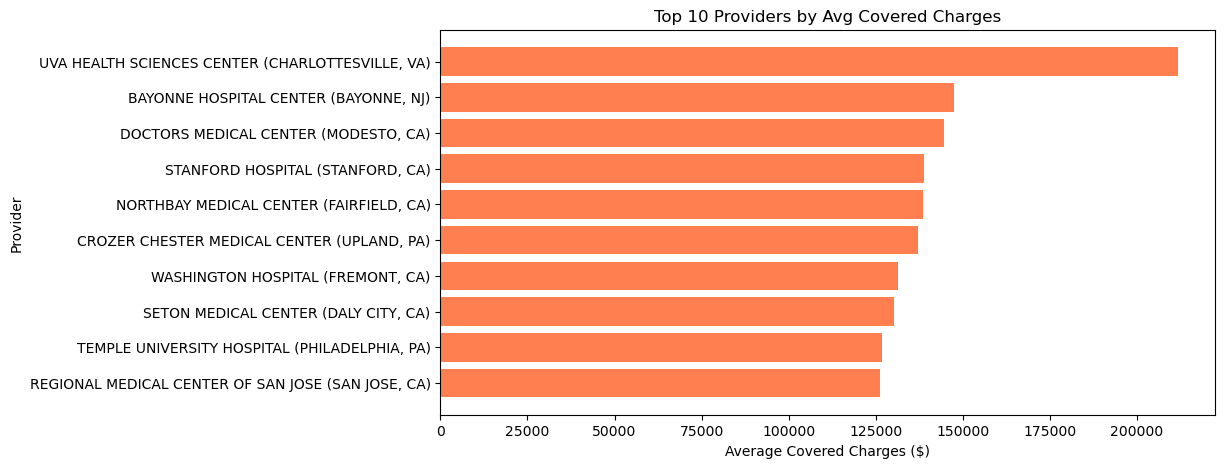

In [40]:

provider_avg_charges =Medicare_Provider_Charge_Inpatient.groupby(['Provider_Name', 'Provider_City', 'Provider_State'])['Average_Covered_Charges'].mean().reset_index()
provider_avg_charges = provider_avg_charges.sort_values(by='Average_Covered_Charges', ascending=False).head(10)
print("\nTop 10 Providers by Avg Covered Charges:\n", provider_avg_charges)

# Plot Top 10 Providers by Average Covered Charges
plt.figure(figsize=(10, 5))
plt.barh(provider_avg_charges['Provider_Name'] + ' (' + provider_avg_charges['Provider_City'] + ', ' + provider_avg_charges['Provider_State'] + ')', provider_avg_charges['Average_Covered_Charges'], color='coral')
plt.xlabel('Average Covered Charges ($)')
plt.ylabel('Provider')
plt.title('Top 10 Providers by Avg Covered Charges')
plt.gca().invert_yaxis()
plt.show()

#### Top 10 Hospitals by Total Discharges


Top 10 Hospitals by Total Discharges:
                                Provider_Name Provider_State  Total_Discharges
837                         FLORIDA HOSPITAL             FL             25828
1899          NEW YORK-PRESBYTERIAN HOSPITAL             NY             16834
1742                      METHODIST HOSPITAL             TX             15921
459    CHRISTIANA CARE HEALTH SERVICES, INC.             DE             14542
3270               WILLIAM BEAUMONT HOSPITAL             MI             14469
2587          SOUTHCOAST HOSPITAL GROUP, INC             MA             14202
1740  METHODIST HEALTHCARE MEMPHIS HOSPITALS             TN             13736
1817               MONTEFIORE MEDICAL CENTER             NY             12204
1986                   NORTON HOSPITALS, INC             KY             11856
552                 COMMUNITY MEDICAL CENTER             NJ             11646


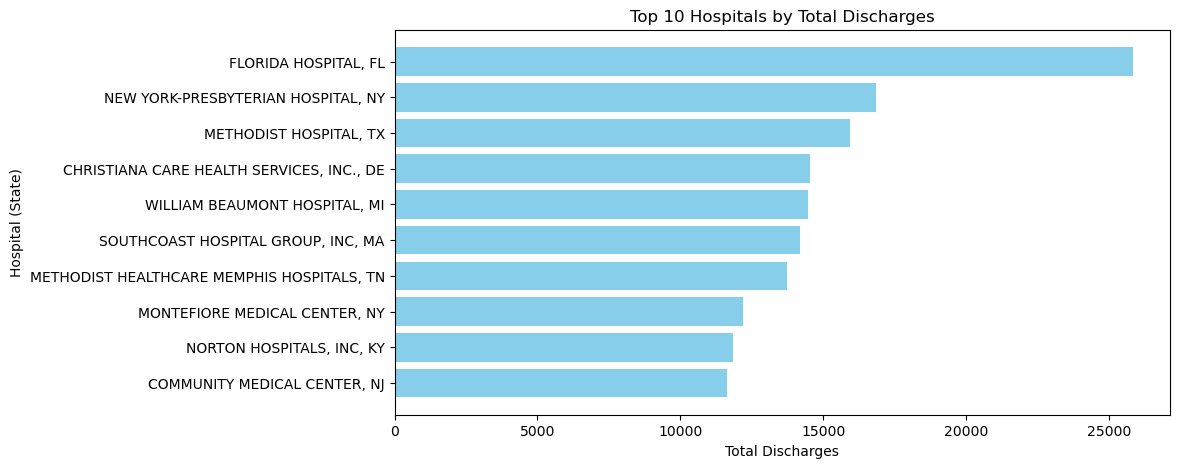

In [41]:

hospital_discharges = Medicare_Provider_Charge_Inpatient.groupby(['Provider_Name', 'Provider_State'])['Total_Discharges'].sum().reset_index()
hospital_discharges = hospital_discharges.sort_values(by='Total_Discharges', ascending=False).head(10)
print("\nTop 10 Hospitals by Total Discharges:\n", hospital_discharges)

# Plot Top 10 Hospitals by Total Discharges
plt.figure(figsize=(10, 5))
plt.barh(hospital_discharges['Provider_Name'] + ', ' + hospital_discharges['Provider_State'], hospital_discharges['Total_Discharges'], color='skyblue')
plt.xlabel('Total Discharges')
plt.ylabel('Hospital (State)')
plt.title('Top 10 Hospitals by Total Discharges')
plt.gca().invert_yaxis()
plt.show()


#### Cost Variations Across States


Cost Variations Across States:
    Provider_State  Average_Covered_Charges
4              CA             67508.620687
31             NJ             66125.690566
33             NV             61047.119697
9              FL             46016.237799
43             TX             41480.197577
3              AZ             41200.067118
5              CO             41095.140162
0              AK             40348.747320
7              DC             40116.668159
38             PA             39633.963951
14             IL             36061.854130
40             SC             35862.498736
47             WA             34714.238227
18             LA             33085.376988
11             HI             32174.752047
29             NE             31736.431952
16             KS             31580.257768
34             NY             31435.689797
6              CT             31318.414406
1              AL             31316.466347
24             MO             31184.627170
10             GA    

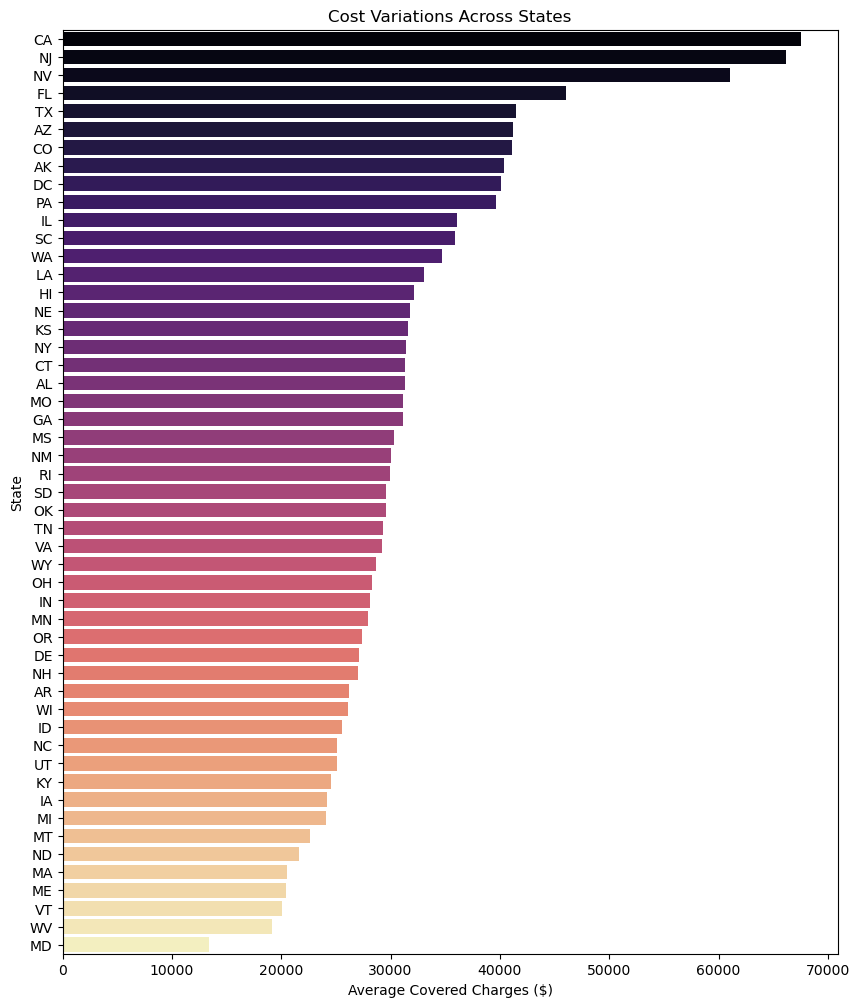

In [42]:

state_charges = Medicare_Provider_Charge_Inpatient.groupby('Provider_State')['Average_Covered_Charges'].mean().reset_index()
state_charges = state_charges.sort_values(by='Average_Covered_Charges', ascending=False)
print("\nCost Variations Across States:\n", state_charges)

# plot for Cost Variations Across States
plt.figure(figsize=(10, 12))
sns.barplot(data=state_charges, y='Provider_State', x='Average_Covered_Charges', palette='magma')
plt.xlabel("Average Covered Charges ($)")
plt.ylabel("State")
plt.title("Cost Variations Across States")
plt.show()



#### Top 10 Regions with Highest Charges


Top 10 Regions with Highest Charges:
     Hospital_Referral_Region_HRR_Description  Average_Covered_Charges
34                     CA - San Mateo County            107043.676378
19                  CA - Contra Costa County            100597.091532
32                             CA - San Jose             90480.155230
22                              CA - Modesto             84410.111135
16                       CA - Alameda County             82368.939558
36                           CA - Santa Cruz             81162.547452
25                CA - Palm Springs/Rancho M             77936.700260
31                        CA - San Francisco             77856.457065
190                       NJ - New Brunswick             76364.656246
191                              NJ - Newark             73339.431670


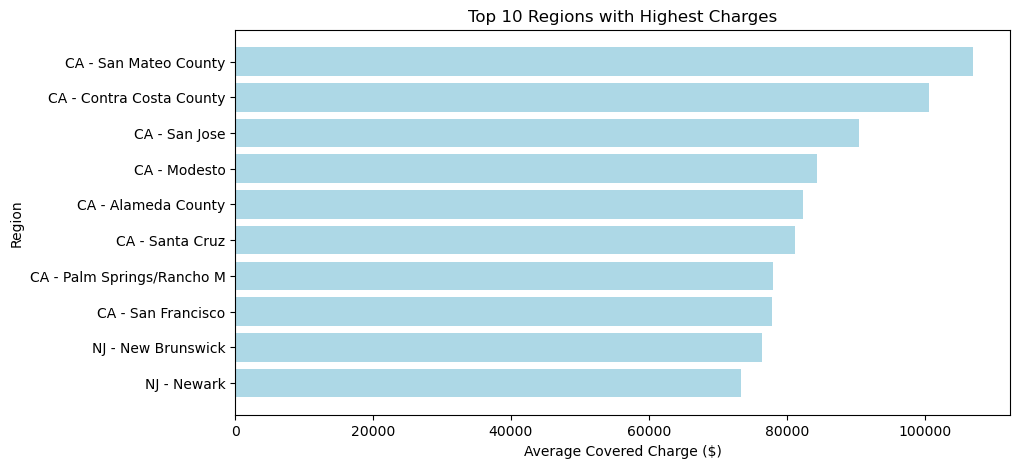

In [43]:

region_charges = Medicare_Provider_Charge_Inpatient.groupby('Hospital_Referral_Region_HRR_Description')['Average_Covered_Charges'].mean().reset_index()
region_charges = region_charges.sort_values(by='Average_Covered_Charges', ascending=False).head(10)
print("\nTop 10 Regions with Highest Charges:\n", region_charges)

# Plot Top 10 Regions with Highest Charges
plt.figure(figsize=(10, 5))
plt.barh(region_charges['Hospital_Referral_Region_HRR_Description'], region_charges['Average_Covered_Charges'], color='lightblue')
plt.xlabel('Average Covered Charge ($)')
plt.ylabel('Region')
plt.title('Top 10 Regions with Highest Charges')
plt.gca().invert_yaxis()
plt.show()

#### Providers with the Largest Charge vs. Medicare Reimbursement Gaps


Top 10 Providers with Largest Charge vs. Medicare Payment Gaps:
                       Provider_Name Provider_State  Average_Covered_Charges  \
3122     UVA HEALTH SCIENCES CENTER             VA            211922.000000   
206         BAYONNE HOSPITAL CENTER             NJ            147441.337826   
678          DOCTORS MEDICAL CENTER             CA            144695.837333   
604   CROZER CHESTER MEDICAL CENTER             PA            137130.851844   
1946        NORTHBAY MEDICAL CENTER             CA            138504.549565   
3181            WASHINGTON HOSPITAL             CA            131510.126660   
2839              STANFORD HOSPITAL             CA            138818.653736   
2489           SETON MEDICAL CENTER             CA            130177.365986   
1947   NORTHBAY VACAVALLEY HOSPITAL             CA            122472.351562   
1010  HAHNEMANN UNIVERSITY HOSPITAL             PA            124023.511468   

      Average_Medicare_Payments  Charge_Payment_Diff  
3122     

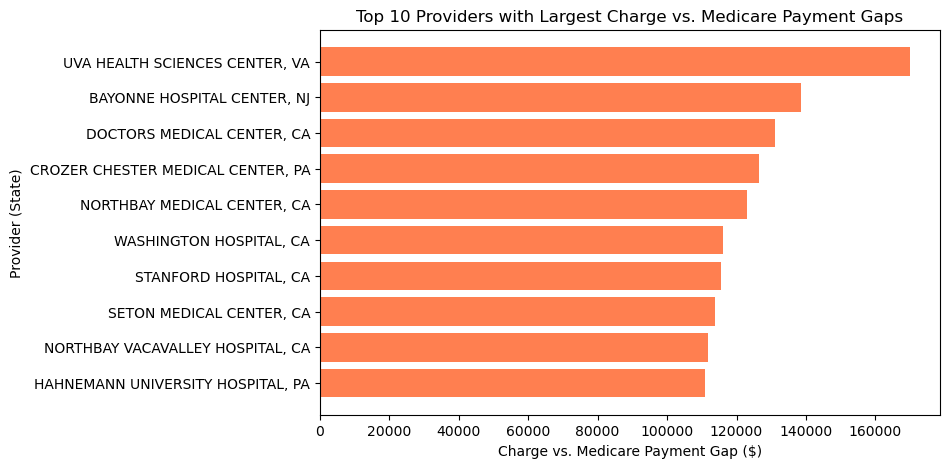

In [44]:

provider_payment_gap = Medicare_Provider_Charge_Inpatient.groupby(['Provider_Name', 'Provider_State']).agg({
    'Average_Covered_Charges': 'mean',
    'Average_Medicare_Payments': 'mean'
}).reset_index()
provider_payment_gap['Charge_Payment_Diff'] = provider_payment_gap['Average_Covered_Charges'] - provider_payment_gap['Average_Medicare_Payments']
provider_payment_gap = provider_payment_gap.sort_values(by='Charge_Payment_Diff', ascending=False).head(10)
print("\nTop 10 Providers with Largest Charge vs. Medicare Payment Gaps:\n", provider_payment_gap)

# Plot Providers with Largest Charge vs. Medicare Payment Gaps
plt.figure(figsize=(8, 5))
plt.barh(provider_payment_gap['Provider_Name'] + ', ' + provider_payment_gap['Provider_State'], provider_payment_gap['Charge_Payment_Diff'], color='coral')
plt.xlabel('Charge vs. Medicare Payment Gap ($)')
plt.ylabel('Provider (State)')
plt.title('Top 10 Providers with Largest Charge vs. Medicare Payment Gaps')
plt.gca().invert_yaxis()
plt.show()

#### Providers Billing more than Twice the Average Charge for the same Procedure

In [45]:

provider_high_charge =Medicare_Provider_Charge_Inpatient.groupby(['DRG_Definition', 'Provider_Name', 'Provider_State'])['Average_Covered_Charges'].mean().reset_index()
overall_avg_charge = Medicare_Provider_Charge_Inpatient['Average_Covered_Charges'].mean()
provider_high_charge = provider_high_charge[provider_high_charge['Average_Covered_Charges'] > 2 * overall_avg_charge]
provider_high_charge = provider_high_charge.sort_values(by='Average_Covered_Charges', ascending=False)
print("\nProviders Billing More Than Twice the Average Charge:\n", provider_high_charge)




Providers Billing More Than Twice the Average Charge:
                                            DRG_Definition  \
40309   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...   
40436   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...   
151652   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS   
151364   870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS   
40328   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...   
...                                                   ...   
88142     330 - MAJOR SMALL & LARGE BOWEL PROCEDURES W CC   
48291   249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...   
115751  481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...   
54633   280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ...   
49483   251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY...   

                                 Provider_Name Provider_State  \
40309                        STANFORD HOSPITAL             CA   
40436                      WASHINGTON HOSPITAL             CA   
151652          

#### Providers with High Patient Volume but Low Average Payments


Providers with High Patient Volume but Low Average Payments:
                                         Provider_Name Provider_State  \
513                    COFFEE REGIONAL MEDICAL CENTER             GA   
2604                SOUTHERN TENNESSEE MEDICAL CENTER             TN   
5                    ADCARE HOSPITAL OF WORCESTER INC             MA   
502                      CLINCH VALLEY MEDICAL CENTER             VA   
2855                   STRINGFELLOW MEMORIAL HOSPITAL             AL   
2107                           PARKLAND HEALTH CENTER             MO   
709                      EAST LIVERPOOL CITY HOSPITAL             OH   
2948                              THE FINLEY HOSPITAL             IA   
1029  HARLAN APPALACHIAN REGIONAL HEALTHCARE HOSPITAL             KY   
767                      ENGLEWOOD COMMUNITY HOSPITAL             FL   
695                     DUNCAN REGIONAL HOSPITAL, INC             OK   
1001                             GULF BREEZE HOSPITAL             FL   
1

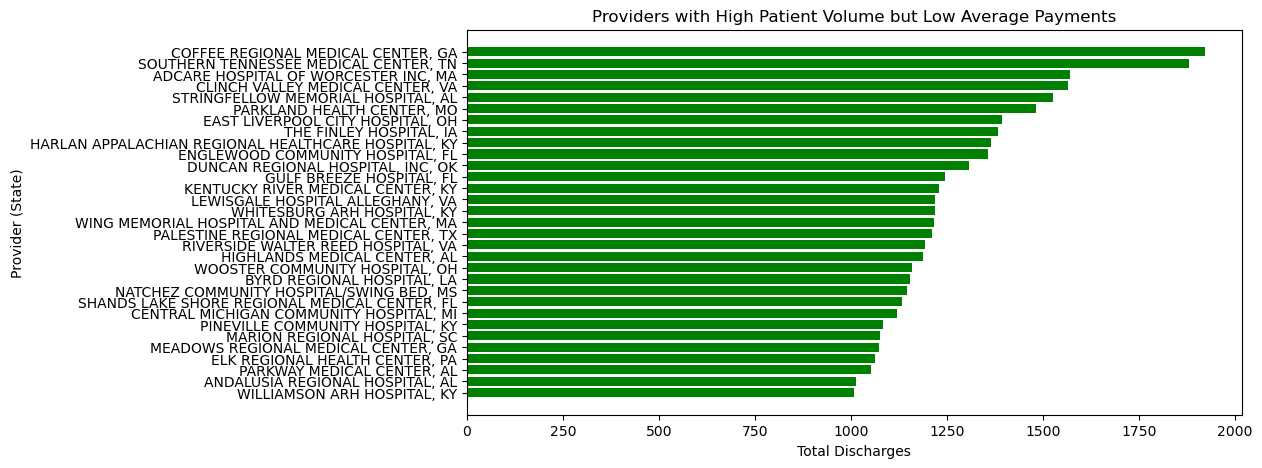

In [46]:

high_volume_low_payment = Medicare_Provider_Charge_Inpatient.groupby(['Provider_Name', 'Provider_State']).agg({
    'Total_Discharges': 'sum',
    'Average_Medicare_Payments': 'mean'
}).reset_index()
high_volume_low_payment = high_volume_low_payment[(high_volume_low_payment['Total_Discharges'] > 1000) & (high_volume_low_payment['Average_Medicare_Payments'] < 5000)]
high_volume_low_payment = high_volume_low_payment.sort_values(by='Total_Discharges', ascending=False)
print("\nProviders with High Patient Volume but Low Average Payments:\n", high_volume_low_payment)

# Plot high volume, low payment providers
plt.figure(figsize=(10, 5))
plt.barh(high_volume_low_payment['Provider_Name'] + ', ' + high_volume_low_payment['Provider_State'], high_volume_low_payment['Total_Discharges'], color='green')
plt.xlabel('Total Discharges')
plt.ylabel('Provider (State)')
plt.title('Providers with High Patient Volume but Low Average Payments')
plt.gca().invert_yaxis()
plt.show()

In [47]:
Medicare_Provider_Charge_Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   APC                                       43372 non-null  object 
 1   Provider_Id                               43372 non-null  int64  
 2   Provider_Name                             43372 non-null  object 
 3   Provider_Street_Address                   43372 non-null  object 
 4   Provider_City                             43372 non-null  object 
 5   Provider_State                            43372 non-null  object 
 6   Provider_Zip_Code                         43372 non-null  int64  
 7   Hospital_Referral_Region_HRR_Description  43372 non-null  object 
 8   Outpatient_Services                       43372 non-null  int64  
 9   Average_Estimated_Submitted_Charges       43372 non-null  float64
 10  Average_Total_Payments            

#### Summary Outpatient

In [48]:
summary_outpatient = {
    "Total_Records": len(Medicare_Provider_Charge_Outpatient),
    "Unique_Providers": Medicare_Provider_Charge_Outpatient['Provider_Id'].nunique(),
    "Unique_APCs": Medicare_Provider_Charge_Outpatient["APC"].nunique(),
    "Unique_States": Medicare_Provider_Charge_Outpatient["Provider_State"].nunique()
}

summary_outpatient_df = pd.DataFrame([summary_outpatient])
print(summary_outpatient_df)


   Total_Records  Unique_Providers  Unique_APCs  Unique_States
0          43372              3135           30             50


#### Top 10 Most Expensive Procedures (APCs)


Top 10 Most Expensive Procedures (APCs):
                                                   APC  \
6              0074 - Level IV Endoscopy Upper Airway   
21                    0377 - Level II Cardiac Imaging   
9                    0203 - Level IV Nerve Injections   
13  0209 - Level II Extended EEG, Sleep, and Cardi...   
4                    0020 - Level II Excision/ Biopsy   
17   0270 - Level III Echocardiogram Without Contrast   
18  0336 - Magnetic Resonance Imaging and Magnetic...   
12                  0207 - Level III Nerve Injections   
3                     0019 - Level I Excision/ Biopsy   
16    0269 - Level II Echocardiogram Without Contrast   

    Average_Estimated_Submitted_Charges  
6                           7139.881208  
21                          4574.468409  
9                           3675.637536  
13                          3631.534993  
4                           3430.854935  
17                          3033.884728  
18                          2611.01

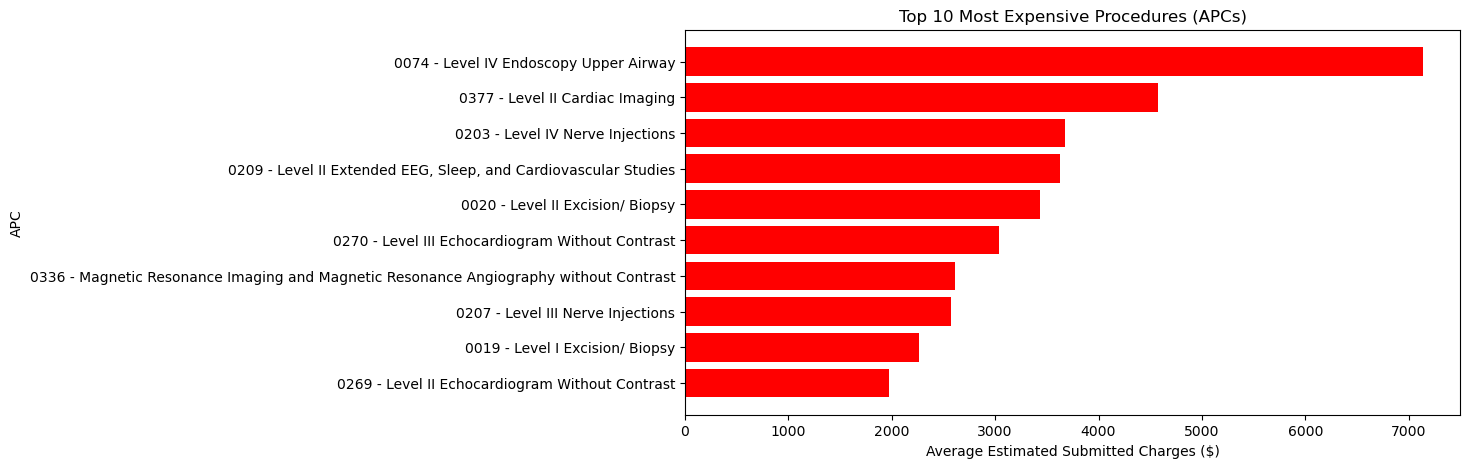

In [49]:

top_apc_charges = Medicare_Provider_Charge_Outpatient.groupby('APC')['Average_Estimated_Submitted_Charges'].mean().reset_index()
top_apc_charges = top_apc_charges.sort_values(by='Average_Estimated_Submitted_Charges', ascending=False).head(10)
print("\nTop 10 Most Expensive Procedures (APCs):\n", top_apc_charges)

# Plot top 10 APCs by average charges
plt.figure(figsize=(10, 5))
plt.barh(top_apc_charges['APC'], top_apc_charges['Average_Estimated_Submitted_Charges'], color='red')
plt.xlabel('Average Estimated Submitted Charges ($)')
plt.ylabel('APC')
plt.title('Top 10 Most Expensive Procedures (APCs)')
plt.gca().invert_yaxis()
plt.show()

#### Cost & Payment Gaps by Hospital Referral Region (HRR)

In [50]:

hrr_cost_gap = Medicare_Provider_Charge_Outpatient.groupby('Hospital_Referral_Region_HRR_Description').agg({
    'Average_Estimated_Submitted_Charges': 'mean',
    'Average_Total_Payments': 'mean'
}).reset_index()
hrr_cost_gap['Avg_Gap'] = hrr_cost_gap['Average_Estimated_Submitted_Charges'] - hrr_cost_gap['Average_Total_Payments']
hrr_cost_gap = hrr_cost_gap.sort_values(by='Avg_Gap', ascending=False)
print("\nCost & Payment Gaps by Hospital Referral Region (HRR):\n", hrr_cost_gap)



Cost & Payment Gaps by Hospital Referral Region (HRR):
     Hospital_Referral_Region_HRR_Description  \
57                               FL - Hudson   
65                            FL - Pensacola   
230                        PA - Philadelphia   
265                             TX - McAllen   
88                               IL - Aurora   
..                                       ...   
131                              ME - Bangor   
202                           NY - Rochester   
87                          ID - Idaho Falls   
177                            ND - Bismarck   
198                             NY - Buffalo   

     Average_Estimated_Submitted_Charges  Average_Total_Payments      Avg_Gap  
57                           3267.836685              282.208640  2985.628045  
65                           2702.742786              273.416474  2429.326312  
230                          2638.394521              286.160366  2352.234156  
265                          2545.273131      

#### Top 10 Providers with Largest Charge vs. Medicare Reimbursement Gaps


Top 10 Providers with Largest Charge vs. Medicare Reimbursement Gaps:
       Provider_Id                                Provider_Name Provider_State  \
284         50205          EAST VALLEY HOSPITAL MEDICAL CENTER             CA   
3120       670029                     FIRST STREET HOSPITAL LP             TX   
2770       450683                 RENAISSANCE HOSPITAL TERRELL             TX   
655        100223             FORT WALTON BEACH MEDICAL CENTER             FL   
2796       450774             TOPS SURGICAL SPECIALTY HOSPITAL             TX   
1675       290046        SPRING VALLEY HOSPITAL MEDICAL CENTER             NV   
667        100243                    BRANDON REGIONAL HOSPITAL             FL   
1753       310118          MEADOWLANDS HOSPITAL MEDICAL CENTER             NJ   
3111       670005  MEMORIAL HERMANN SURGICAL HOSPITAL KINGWOOD             TX   
645        100191                    MEDICAL CENTER OF TRINITY             FL   

      Average_Estimated_Submitted_Ch

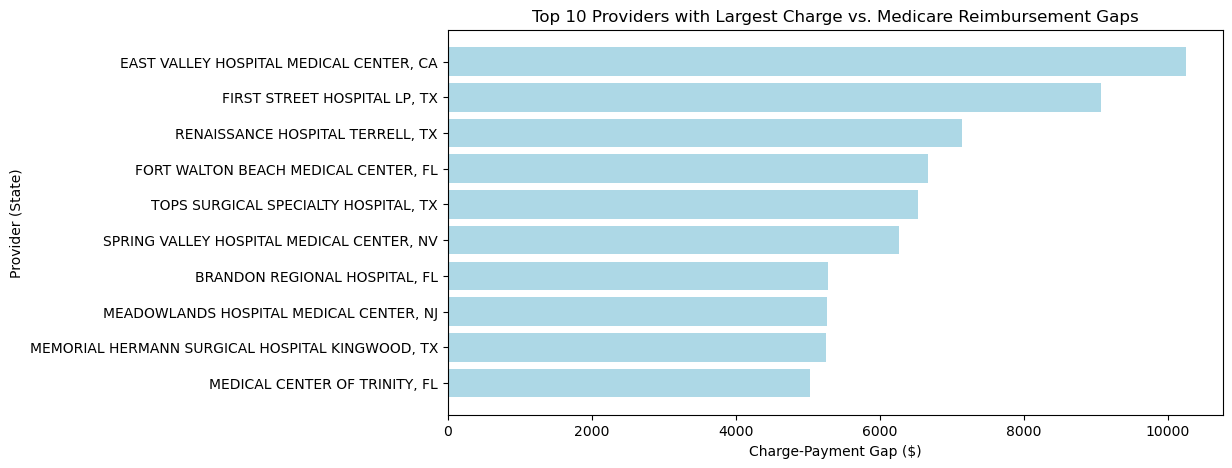

In [51]:

top_providers_gap = Medicare_Provider_Charge_Outpatient.groupby(['Provider_Id', 'Provider_Name', 'Provider_State']).agg({
    'Average_Estimated_Submitted_Charges': 'mean',
    'Average_Total_Payments': 'mean'
}).reset_index()
top_providers_gap['Charge_Payment_Gap'] = top_providers_gap['Average_Estimated_Submitted_Charges'] - top_providers_gap['Average_Total_Payments']
top_providers_gap = top_providers_gap.sort_values(by='Charge_Payment_Gap', ascending=False).head(10)
print("\nTop 10 Providers with Largest Charge vs. Medicare Reimbursement Gaps:\n", top_providers_gap)

# Plot charge-payment gaps by provider
plt.figure(figsize=(10, 5))
plt.barh(top_providers_gap['Provider_Name'] + ', ' + top_providers_gap['Provider_State'], top_providers_gap['Charge_Payment_Gap'], color='lightblue')
plt.xlabel('Charge-Payment Gap ($)')
plt.ylabel('Provider (State)')
plt.title('Top 10 Providers with Largest Charge vs. Medicare Reimbursement Gaps')
plt.gca().invert_yaxis()
plt.show()


#### Solutions

In [52]:
Medicare_Charge_Inpatient_Summary.head()

,DRG_Definition,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.552734,6902.381348,5514.436035
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.980469,6809.799316,5791.920410
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.957031,13614.616211,12415.825195
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.273438,8037.269531,6858.688965
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.062500,5762.881836,4508.202637


In [53]:
Medicare_Charge_Inpatient_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DRG_Definition             100 non-null    object 
 1   Total_Discharges           100 non-null    int64  
 2   Average_Covered_Charges    100 non-null    float64
 3   Average_Total_Payments     100 non-null    float64
 4   Average_Medicare_Payments  100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [54]:
Medicare_Charge_Outpatient_Summary.head()

,APC,Outpatient_Services,Average_Estimated_Submitted_Charges,Average_Total_Payments
0,0012 - Level I Debridement & Destruction,275987,74.202957,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170074,56.133854
2,0015 - Level III Debridement & Destruction,509576,326.503448,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.182007,330.908356
4,0020 - Level II Excision/ Biopsy,40642,3161.457764,567.156128


In [55]:
Medicare_Charge_Outpatient_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   APC                                  30 non-null     object 
 1   Outpatient_Services                  30 non-null     int64  
 2   Average_Estimated_Submitted_Charges  30 non-null     float64
 3   Average_Total_Payments               30 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [56]:
Medicare_Provider_Charge_Inpatient.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_HRR_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.078125,5777.241699,4763.736328
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.857422,5787.571289,4976.714355
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.375000,5434.958496,4453.791504
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280273,5417.560059,4129.160156
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.277344,5658.333496,4851.444336


In [57]:
Medicare_Provider_Charge_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   DRG_Definition                            163065 non-null  object 
 1   Provider_Id                               163065 non-null  int64  
 2   Provider_Name                             163065 non-null  object 
 3   Provider_Street_Address                   163065 non-null  object 
 4   Provider_City                             163065 non-null  object 
 5   Provider_State                            163065 non-null  object 
 6   Provider_Zip_Code                         163065 non-null  int64  
 7   Hospital_Referral_Region_HRR_Description  163065 non-null  object 
 8   Total_Discharges                          163065 non-null  int64  
 9   Average_Covered_Charges                   163065 non-null  float64
 10  Average_Total_Paymen

In [58]:
Medicare_Provider_Charge_Outpatient.head()

,APC,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_HRR_Description,Outpatient_Services,Average_Estimated_Submitted_Charges,Average_Total_Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086960,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589752,36.623852
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135410,14.541842
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400002,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045456,16.569092


In [59]:
Medicare_Provider_Charge_Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   APC                                       43372 non-null  object 
 1   Provider_Id                               43372 non-null  int64  
 2   Provider_Name                             43372 non-null  object 
 3   Provider_Street_Address                   43372 non-null  object 
 4   Provider_City                             43372 non-null  object 
 5   Provider_State                            43372 non-null  object 
 6   Provider_Zip_Code                         43372 non-null  int64  
 7   Hospital_Referral_Region_HRR_Description  43372 non-null  object 
 8   Outpatient_Services                       43372 non-null  int64  
 9   Average_Estimated_Submitted_Charges       43372 non-null  float64
 10  Average_Total_Payments            

In [60]:
conn.close() 

#### Part 1A: Highest Cost Variation 

In [61]:
def coefficient_of_variation(df, charge_col, group_col):
    summary = df.groupby(group_col)[charge_col].agg(['mean', 'std'])
    summary['CV'] = summary['std'] / summary['mean']
    return summary.sort_values(by='CV', ascending=False)

##### Inpatient: Highest CV for DRG (Diagnosis-Related Groups)

In [62]:
cv_inpatient = coefficient_of_variation(Medicare_Provider_Charge_Inpatient, 'Average_Covered_Charges', 'DRG_Definition')

##### Outpatient: Highest CV for APC (Ambulatory Payment Classifications)

In [63]:
cv_outpatient = coefficient_of_variation(Medicare_Provider_Charge_Outpatient, 'Average_Estimated_Submitted_Charges', 'APC')


In [64]:
print("Top 3 procedures with highest cost variation (Inpatient):")
print(cv_inpatient.head(3))

Top 3 procedures with highest cost variation (Inpatient):
                                                            mean  \
DRG_Definition                                                     
885 - PSYCHOSES                                     19929.455790   
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHA...  17589.098716   
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC      40345.535841   

                                                             std        CV  
DRG_Definition                                                              
885 - PSYCHOSES                                     14305.275033  0.717796  
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHA...  11150.914643  0.633967  
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC      24737.866921  0.613150  


In [65]:
print("Top 3 procedures with highest cost variation (Outpatient):")
print(cv_outpatient.head(3))

Top 3 procedures with highest cost variation (Outpatient):
                                               mean          std        CV
APC                                                                       
0604 - Level 1 Hospital Clinic Visits    169.784228   235.176546  1.385150
0698 - Level II Eye Tests & Treatments   250.677098   328.498339  1.310444
0019 - Level I Excision/ Biopsy         2264.425958  2785.011221  1.229897


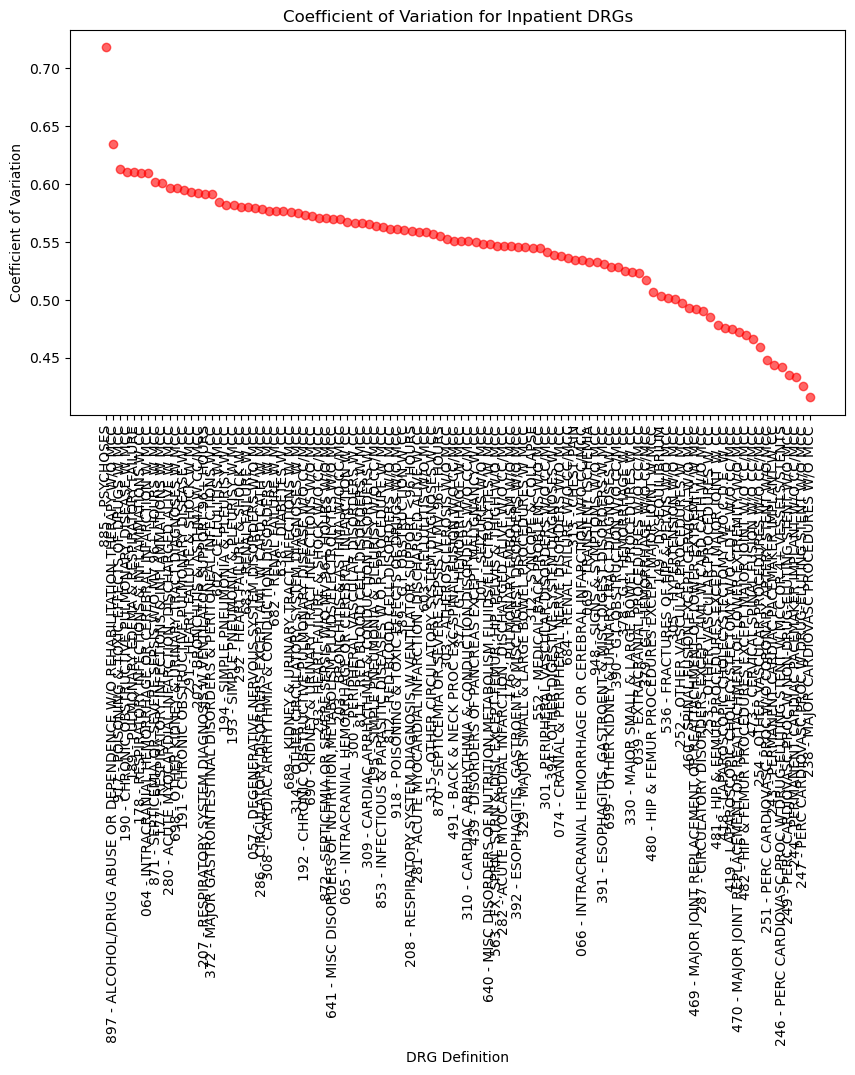

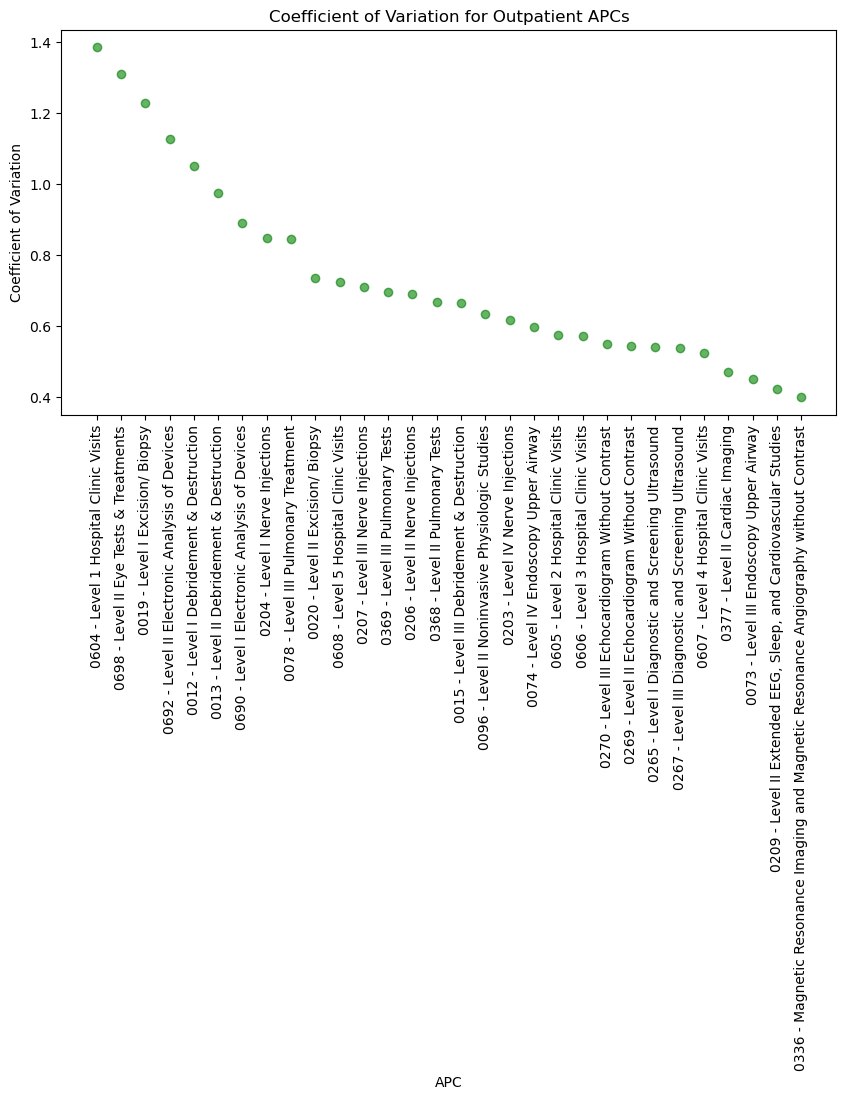

In [66]:
# Plot Coefficient of Variation for DRGs (Inpatient)
plt.figure(figsize=(10, 5))
plt.scatter(cv_inpatient.index, cv_inpatient['CV'], color='red', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('DRG Definition')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation for Inpatient DRGs')
plt.show()

# Plot Coefficient of Variation for APCs (Outpatient)
plt.figure(figsize=(10, 5))
plt.scatter(cv_outpatient.index, cv_outpatient['CV'], color='green', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('APC')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation for Outpatient APCs')
plt.show()


Key Takeaways:

* Outpatient costs are more inconsistent, suggesting provider-driven pricing differences.
* Inpatient costs vary due to medical necessity (severity, treatment length).
* Mental health and addiction treatments show major pricing inconsistencies.

#### Part 1B: Highest-Cost Claims by Provider

##### Impatient

In [67]:
top_inpatient_providers = Medicare_Provider_Charge_Inpatient.groupby(['Provider_Id', 'Provider_Name'])['Average_Covered_Charges'].mean().sort_values(ascending=False)

In [68]:
print("Top 5 providers with highest average covered charges for inpatients:")
print(top_inpatient_providers.head(5))

Top 5 providers with highest average covered charges for inpatients:
Provider_Id  Provider_Name             
490142       UVA HEALTH SCIENCES CENTER    211922.000000
310025       BAYONNE HOSPITAL CENTER       147441.337826
50464        DOCTORS MEDICAL CENTER        144695.837333
50441        STANFORD HOSPITAL             138818.653736
50367        NORTHBAY MEDICAL CENTER       138504.549565
Name: Average_Covered_Charges, dtype: float64


##### Outpatients

In [69]:
top_outpatient_providers =Medicare_Provider_Charge_Outpatient.groupby(['Provider_Id', 'Provider_Name'])['Average_Estimated_Submitted_Charges']\
                                        .mean().sort_values(ascending=False)


In [70]:
print("Top 5 providers with highest average covered charges for outpatients:")
print(top_outpatient_providers.head(5))

Top 5 providers with highest average covered charges for outpatients:
Provider_Id  Provider_Name                      
50205        EAST VALLEY HOSPITAL MEDICAL CENTER    10836.473633
670029       FIRST STREET HOSPITAL LP                9498.550781
450683       RENAISSANCE HOSPITAL TERRELL            7637.296875
450774       TOPS SURGICAL SPECIALTY HOSPITAL        7044.644043
100223       FORT WALTON BEACH MEDICAL CENTER        7016.688639
Name: Average_Estimated_Submitted_Charges, dtype: float64


#### Part 1C: Highest-Cost Claims by Region

##### Inpatients

In [71]:
top_inpatient_regions = Medicare_Provider_Charge_Inpatient.groupby('Hospital_Referral_Region_HRR_Description')['Average_Covered_Charges'].mean().sort_values(ascending=False)

In [72]:
print("Top 5 regions with highest average covered charges for inpatients:")
print(top_inpatient_regions.head(5))

Top 5 regions with highest average covered charges for inpatients:
Hospital_Referral_Region_HRR_Description
CA - San Mateo County       107043.676378
CA - Contra Costa County    100597.091532
CA - San Jose                90480.155230
CA - Modesto                 84410.111135
CA - Alameda County          82368.939558
Name: Average_Covered_Charges, dtype: float64


##### Outpatients

In [73]:
top_outpatient_regions =  Medicare_Provider_Charge_Outpatient.groupby('Hospital_Referral_Region_HRR_Description')['Average_Estimated_Submitted_Charges']\
                                      .mean().sort_values(ascending=False)


In [74]:
print("Top 5 regions with highest average covered charges for outpatients:")
print(top_outpatient_regions.head(5))

Top 5 regions with highest average covered charges for outpatients:
Hospital_Referral_Region_HRR_Description
FL - Hudson          3267.836685
FL - Pensacola       2702.742786
PA - Philadelphia    2638.394521
NJ - Ridgewood       2565.013415
CA - Santa Cruz      2553.957174
Name: Average_Estimated_Submitted_Charges, dtype: float64


#### Part 1D: Highest Number of Procedures & Largest Claim-Reimbursement Gaps

In [75]:
most_procedures = Medicare_Provider_Charge_Inpatient.groupby(['Provider_Id', 'Provider_Name'])['Total_Discharges'].sum().sort_values(ascending=False)

In [76]:
Medicare_Provider_Charge_Inpatient['Claim_Reimbursement_Gap'] = Medicare_Provider_Charge_Inpatient['Average_Covered_Charges'] - Medicare_Provider_Charge_Inpatient['Average_Medicare_Payments']
largest_gaps = Medicare_Provider_Charge_Inpatient.groupby(['Provider_Id', 'Provider_Name'])['Claim_Reimbursement_Gap'].mean().sort_values(ascending=False)

In [77]:
print("Top 5 providers with the highest number of procedures:")
print(most_procedures.head(5))

Top 5 providers with the highest number of procedures:
Provider_Id  Provider_Name                        
100007       FLORIDA HOSPITAL                         25828
330101       NEW YORK-PRESBYTERIAN HOSPITAL           16834
450388       METHODIST HOSPITAL                       15921
80001        CHRISTIANA CARE HEALTH SERVICES, INC.    14542
230130       WILLIAM BEAUMONT HOSPITAL                14469
Name: Total_Discharges, dtype: int64


In [78]:
print("Top 5 providers with largest claim-reimbursement gaps:")
print(largest_gaps.head(5))

Top 5 providers with largest claim-reimbursement gaps:
Provider_Id  Provider_Name                
490142       UVA HEALTH SCIENCES CENTER       170085.109375
310025       BAYONNE HOSPITAL CENTER          138649.964933
50464        DOCTORS MEDICAL CENTER           131195.675991
390180       CROZER CHESTER MEDICAL CENTER    126528.377794
50367        NORTHBAY MEDICAL CENTER          123159.170714
Name: Claim_Reimbursement_Gap, dtype: float64


* The top five providers with the largest claim-reimbursement gaps highlight significant financial discrepancies in the healthcare system.
* UVA Health Sciences Center leads with a (170,085 dollars) gap, likely due to high-cost specialized treatments with lower insurer reimbursements. Other providers, including Bayonne Hospital Center (138,650 dollars) and Doctors Medical Center (131,196 dollars), also show substantial gaps, possibly driven by high charges, underpaid claims, or regional pricing differences.


#### Part 2: Identifying Least Similar Providers & Regions

##### Least Similar Providers

In [79]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Select relevant numerical features
features = ['Average_Covered_Charges', 'Average_Total_Payments', 'Average_Medicare_Payments', 'Total_Discharges']
df_clustering = Medicare_Provider_Charge_Inpatient[['Provider_Id', 'Provider_Name'] + features].groupby(['Provider_Id', 'Provider_Name']).mean()

# Reset index to retain Provider_Id and Provider_Name
df_clustering = df_clustering.reset_index()

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering[features])

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_clustering['Cluster'] = kmeans.fit_predict(df_scaled)

# Compute cluster centroids and find the most distinct cluster
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
overall_mean = cluster_centroids.mean()
distances = cluster_centroids.apply(lambda x: np.linalg.norm(x - overall_mean), axis=1)

# Rank clusters by their distance from the overall mean
distinct_clusters = distances.sort_values(ascending=False).index

# Initialize list before using .extend()
least_similar_providers = []

# Find least similar providers (at least 3 providers)
for cluster in distinct_clusters:
    cluster_providers = df_clustering[df_clustering['Cluster'] == cluster][['Provider_Id', 'Provider_Name', 'Average_Covered_Charges', 'Average_Total_Payments']]
    least_similar_providers.append(cluster_providers)
    if len(pd.concat(least_similar_providers)) >= 3:
        break

# Concatenate all selected providers into a single DataFrame
least_similar_providers = pd.concat(least_similar_providers).head(3)



In [80]:

print("Three providers least like others:")
print(least_similar_providers)

Three providers least like others:
      Provider_Id                     Provider_Name  Average_Covered_Charges  \
1444       220062  ADCARE HOSPITAL OF WORCESTER INC              4227.467773   
1           10005     MARSHALL MEDICAL CENTER SOUTH             16451.095643   
3           10007          MIZELL MEMORIAL HOSPITAL             12079.540838   

      Average_Total_Payments  
1444             4967.568359  
1                6812.135563  
3                4860.834051  


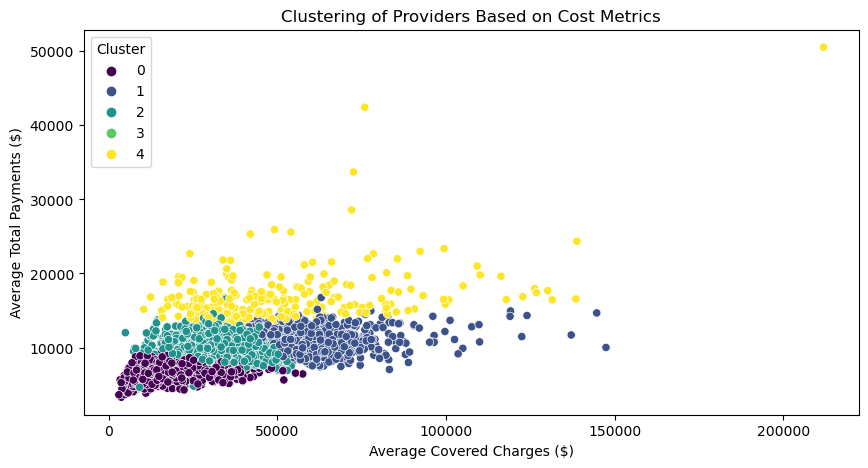

In [81]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_clustering['Average_Covered_Charges'], y=df_clustering['Average_Total_Payments'], hue=df_clustering['Cluster'], palette='viridis')
plt.title("Clustering of Providers Based on Cost Metrics")
plt.xlabel("Average Covered Charges ($)")
plt.ylabel("Average Total Payments ($)")
plt.show()

##### Least Similar Regions

In [82]:

# Select relevant numerical features
features = ['Average_Covered_Charges', 'Average_Total_Payments', 'Average_Medicare_Payments', 'Total_Discharges']
df_region_clustering = Medicare_Provider_Charge_Inpatient[['Hospital_Referral_Region_HRR_Description'] + features].groupby('Hospital_Referral_Region_HRR_Description').mean()

# Standardize the features
scaler = StandardScaler()
df_region_scaled = scaler.fit_transform(df_region_clustering)

# Run K-Means clustering
kmeans_region = KMeans(n_clusters=5, random_state=42, n_init=10)
df_region_clustering['Cluster'] = kmeans_region.fit_predict(df_region_scaled)

# Compute cluster centroids and find the most distinct cluster
cluster_centroids = pd.DataFrame(kmeans_region.cluster_centers_, columns=features)
overall_mean = cluster_centroids.mean()
distances = cluster_centroids.apply(lambda x: np.linalg.norm(x - overall_mean), axis=1)

# Identify the most distinct cluster (farthest from the mean)
least_similar_cluster = distances.idxmax()

# Get actual region names from that cluster
least_similar_regions = df_region_clustering[df_region_clustering['Cluster'] == least_similar_cluster].index



C:\Users\hp\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [83]:
# Print three least similar regions
print("Three regions least like others:")
print(least_similar_regions[:3])


Three regions least like others:
Index(['AK - Anchorage', 'CA - Alameda County', 'CA - Contra Costa County'], dtype='object', name='Hospital_Referral_Region_HRR_Description')


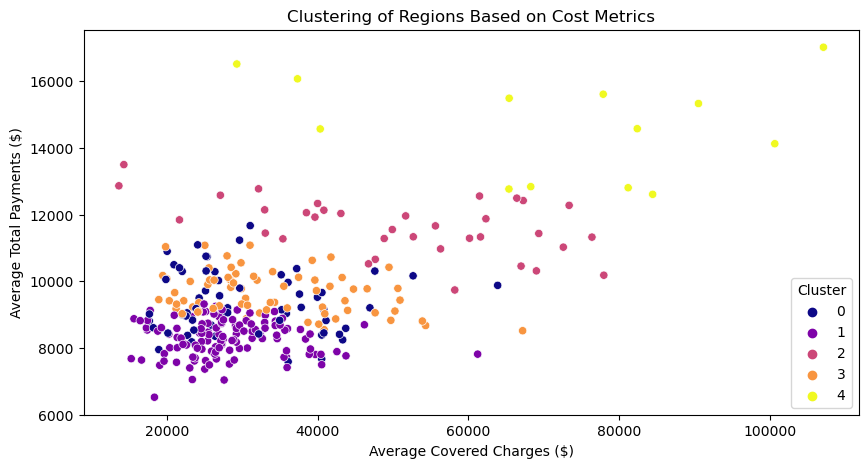

In [84]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_region_clustering['Average_Covered_Charges'], y=df_region_clustering['Average_Total_Payments'], hue=df_region_clustering['Cluster'], palette='plasma')
plt.title("Clustering of Regions Based on Cost Metrics")
plt.xlabel("Average Covered Charges ($)")
plt.ylabel("Average Total Payments ($)")
plt.show()
